<a href="https://colab.research.google.com/github/Anuradha-banda/car-sales-EDAanalysis/blob/main/Car_sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement

"This dataset was collected by Anton Bobanev from car sale advertisements for study/practice purposes in 2016"

# 1.1 Introduction

This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation.

# 1.2 Data source and dataset
a. How was it collected?

Name: "Anton Bobanev from car sale advertisements"

Year: 2016

Description: "This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation. This dataset was collected by Anton Bobanev from car sale advertisements for study/practice purposes in 2016"

b. Is it a sample? If yes, was it properly sampled?

Yes, it is a sample. We don't have official information about the data collection method, but it appears not to be a random sample, so we can assume that it is not **representative

# 2. Data Loading and Description

The dataset comprises of 9576 observations of 10 columns. Below is a table showing names of all the columns and their description

| Column Name   | Description                                                   |
| ------------- |:-------------------------------------------------------------:|
| car           | manufacturer brand                                            |
| price         | seller’s price in advertisement (in USD)                      |  
| body          | car body type                                                 |
| mileage       | as mentioned in advertisement (‘000 Km)                       |   
| engV          | rounded engine volume (‘000 cubic cm)                         |
| engType       | type of fuel (“Other” in this case should be treated as NA)   |
| registration  | whether car registered in Ukraine or not                      |
| year          | year of production                                            |
| model         | specific model name                                           |
| drive         | drive type                                                    |

# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Importing dataset

In [ ]:
cars=pd.read_csv("/content/postprocessing_car_sales.csv")
cars

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,front
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


<a id=section301></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [ ]:
cars.shape                                         # This will print the number of rows and comlumns of the Data Frame

(9576, 10)

carsales_data has __9576 rows__ and __10 columns.__

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9576 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9576 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [ ]:
cars.describe(include="all")

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9576.000000,9576,9576,9576.000000,9576,9576
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5699
mean,NaN,15633.317316,NaN,139.625522,2.617051,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,97.628397,5.793361,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,1.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [ ]:
cars.columns  # This will print the names of all columns.

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [ ]:
cars.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [ ]:
#Mileage
mileage_avg = sum(cars['mileage']) / len(cars['mileage'])
cars['mileage_level'] = ["high mileage" if i > mileage_avg else "low mileage" for i in cars['mileage']]
cars.loc[:10]

,car,price,body,mileage,engV,engType,registration,year,model,drive,mileage_level
0,Ford,15500.000,crossover,68,2.5,Gas,yes,2010,Kuga,full,low mileage
1,Mercedes-Benz,20500.000,sedan,173,1.8,Gas,yes,2011,E-Class,rear,high mileage
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,CL 550,rear,low mileage
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front,high mileage
4,Mercedes-Benz,33000.000,vagon,91,2.0,Other,yes,2013,E-Class,front,low mileage
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full,low mileage
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,Accord,front,high mileage
7,Renault,10500.000,vagon,185,1.5,Diesel,yes,2011,Megane,front,high mileage
8,Mercedes-Benz,21500.000,sedan,146,1.8,Gas,yes,2012,E-Class,rear,high mileage
9,Mercedes-Benz,22700.000,sedan,125,2.2,Diesel,yes,2010,E-Class,rear,low mileage


The dataset doesnot contain missing values, we have also introduced new feature named Mileage_Level.  

- In the Dataset info, Total Missing(%) = 0.0%
- Number of variables = 11
- Observe the newly created variable Mileage_level, Click on Toggle details to get more detailed information about it.

<a id=section5></a>
## 5. Identify patterns in the data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015'),
  Text(19, 0, '2016')])

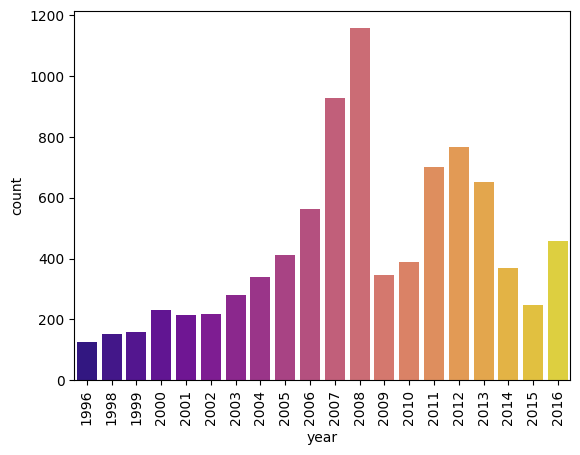

In [ ]:
# cars['year'].value_counts().head(20).plot.bar()
sns.barplot(cars['year'].value_counts().head(20),palette="plasma")
plt.xticks(rotation=90)

Variation of the price range by the vehicle type

Observation:Year 2008 has the highest number of car sales record.

<Axes: xlabel='body', ylabel='count'>

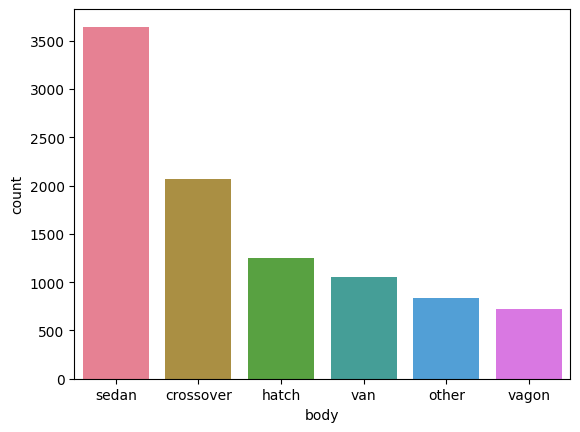

In [ ]:
# cars["body"].value_counts().head(10).plot(kind="bar")
sns.barplot(cars["body"].value_counts().head(10),palette="husl")

Observation:Sedan are most preferred private cars. among public vehicles vans are preferred.

In [ ]:
cars.columns = map(str.lower, cars.columns)
cars['drive'] = cars['drive'].fillna("UnSpecified")
mileage_avg = sum(cars['mileage']) / len(cars['mileage'])
cars['mileage_level'] = ["high mileage" if i > mileage_avg else "low mileage" for i in cars['mileage']]

['Volkswagen', 'Mercedes-Benz', 'BMW', 'Toyota', 'VAZ', 'Renault', 'Audi', 'Opel', 'Nissan', 'Skoda', 'Hyundai', 'Ford', 'Mitsubishi', 'Chevrolet', 'Daewoo']


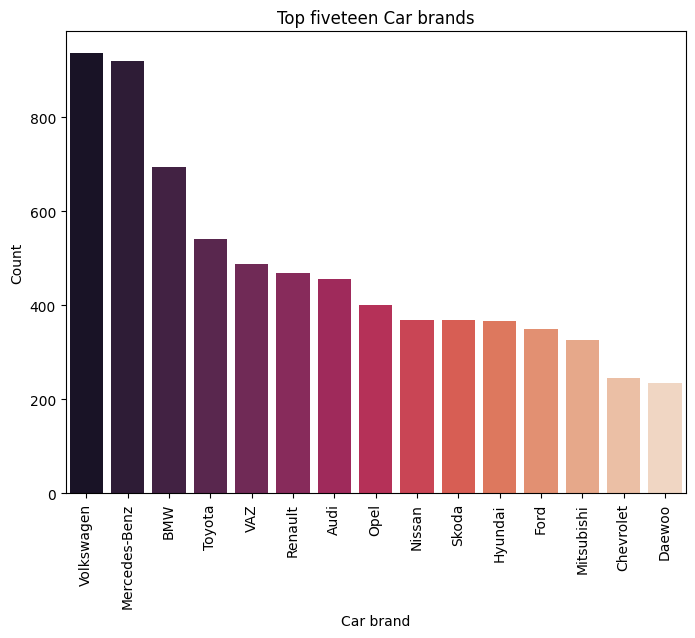

In [ ]:
from collections import Counter
country_count = Counter(cars['car'].dropna().tolist()).most_common(15)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
print(country_idx)
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax,palette="rocket")
plt.title('Top fiveteen Car brands')
plt.xlabel('Car brand')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Observation:Volkswagen and Mercedes-Benz cars are the most popular car brand. followed by brand like BMW, Toyota etc.

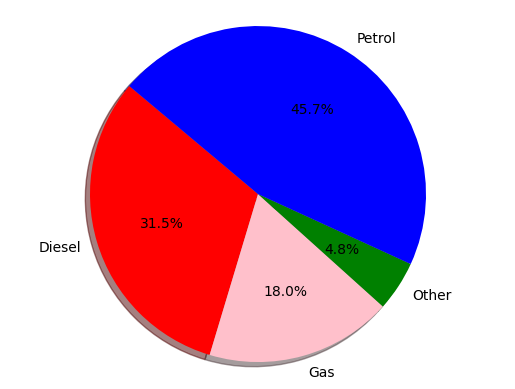

In [ ]:
ct = pd.value_counts(cars['engtype'].values, sort=False)
labels = cars['engtype'].unique()
labels.sort()
sizes = ct
ct.sort_index(inplace=True)
colors = ['red', 'pink', 'green', 'blue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Observation:Petrol cars are the most widely sold Engine Type. Gas and Other fuels are not so commonly used.

<Axes: xlabel='mileage', ylabel='price'>

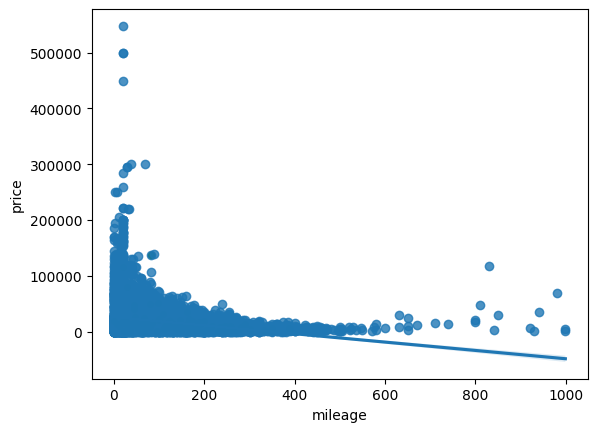

In [ ]:
cars.sample(100).plot.scatter(x='mileage', y='price',color="g")
sns.regplot(x='mileage',y='price',data=cars)

Observation:Mileage and price are indirectly related. high priced cars give low mileage.

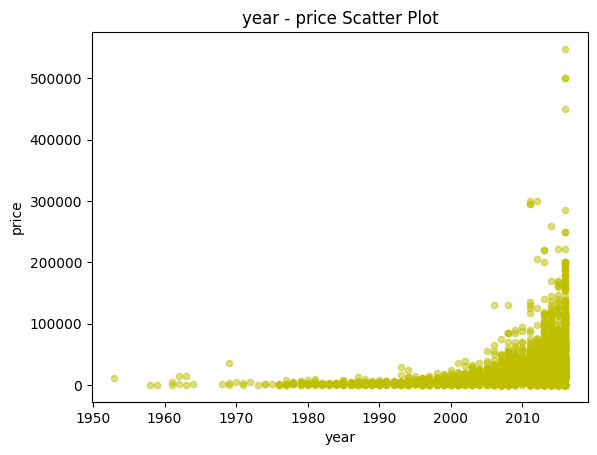

In [ ]:
cars.plot(kind = 'scatter', x='year', y = 'price', alpha = 0.5, color = 'y')
plt.xlabel("year")
plt.ylabel("price")
plt.title("year - price Scatter Plot")
plt.show()

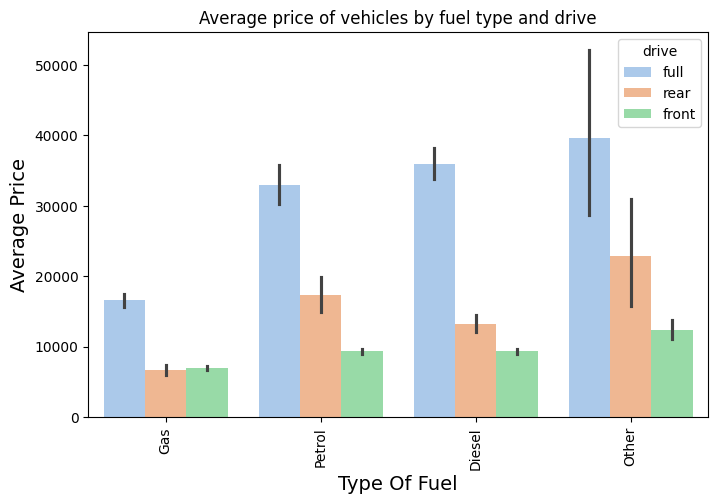

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]

sns.barplot(x="engtype", y="price", hue= "drive", palette="pastel",data=cars)
ax.set_title("Average price of vehicles by fuel type and drive",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()


Observation: Full drive cars of all engine type cars are high priced compared to other fuel types.Followed by the Rear drive cars in all fuel types. In Petrol and Diesel Front drive cars are almost equally priced.

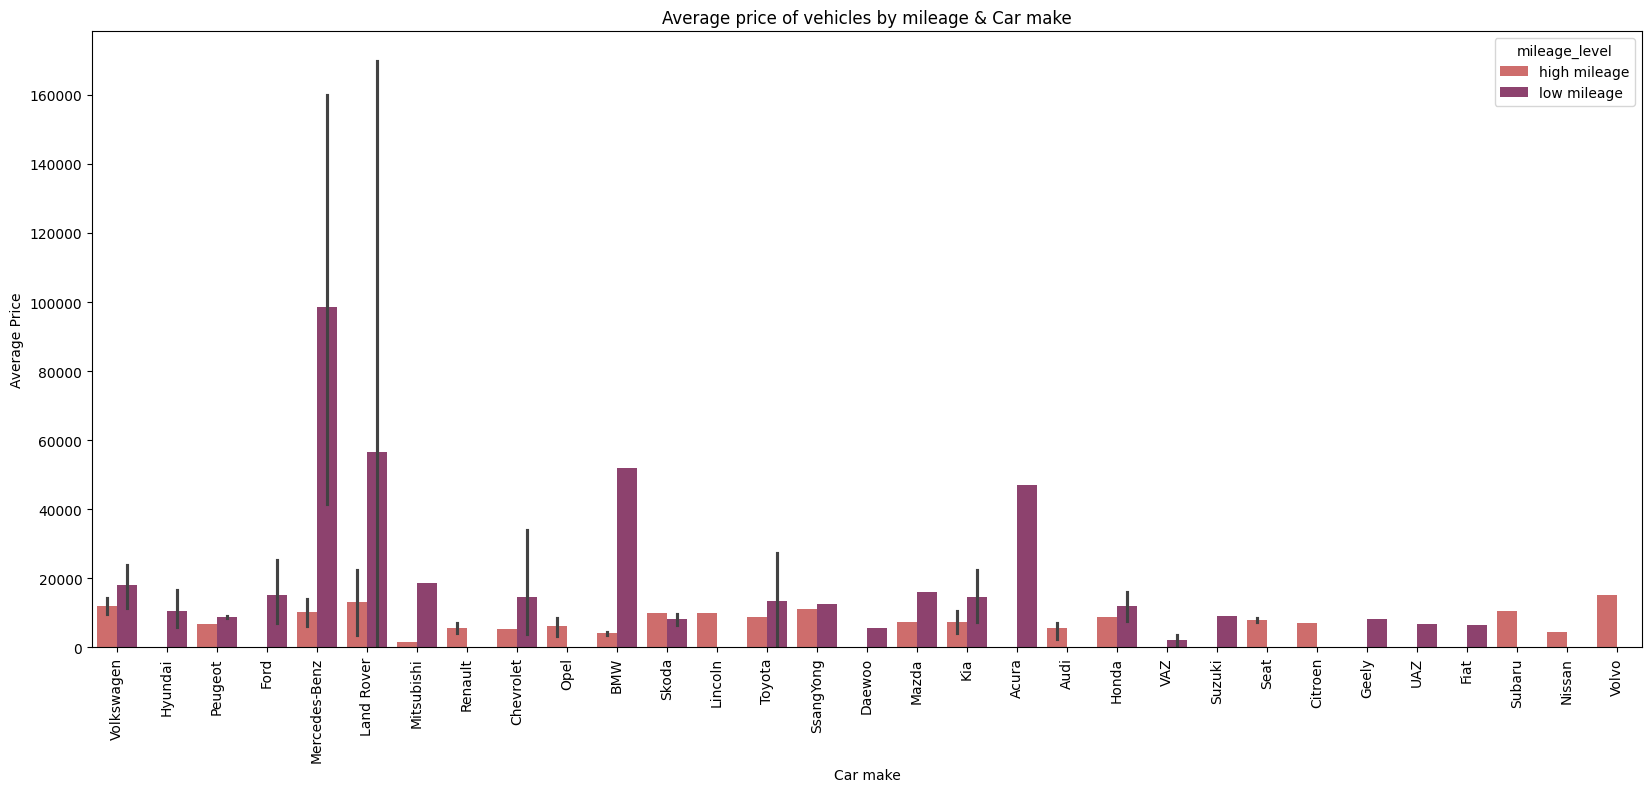

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

Carsales_Sample = cars.sample(100)
sns.barplot(x="car", y="price", hue= "mileage_level", palette="flare",data=Carsales_Sample)
ax.set_title("Average price of vehicles by mileage & Car make",fontdict= {'size':12})
ax.xaxis.set_label_text("Car make",fontdict= {'size':10})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':10})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

Observation:High mileage cars are low priced and vise-versa.

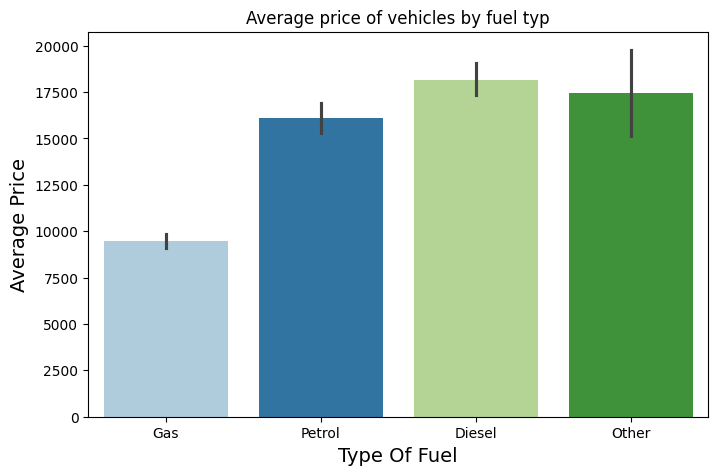

In [ ]:
#Average price of vehicle by fuel type

# barplot for price based on fuel type and gearbox type
fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x="engtype", y="price", palette="Paired",data=cars)
ax.set_title("Average price of vehicles by fuel typ",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

Observation:Diesel vehicals are highly priced.

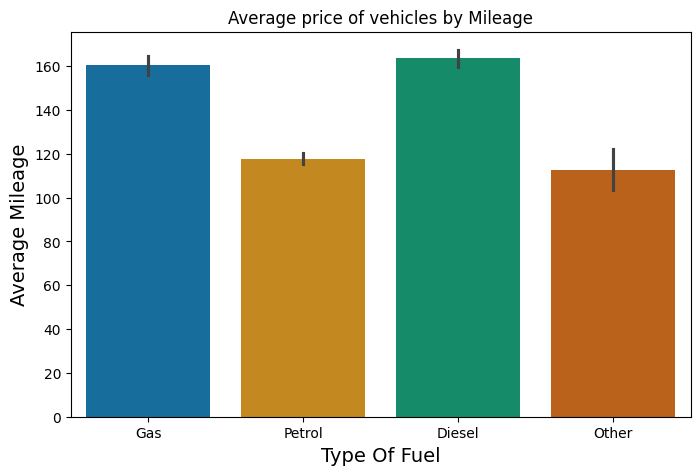

In [ ]:
# barplot for price based on fuel type and gearbox type
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="engtype", y="mileage", palette="colorblind",data=cars)
ax.set_title("Average price of vehicles by Mileage",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Mileage",fontdict= {'size':14})
plt.show()

Observation:Diesel and Gas cars provide highest mileage.Followed by petrol cars.

<Axes: xlabel='drive', ylabel='count'>

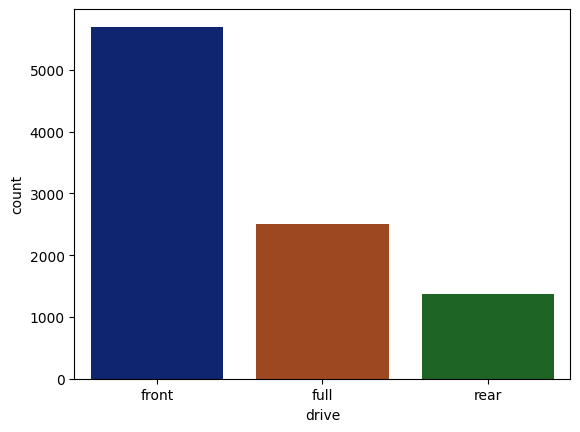

In [ ]:
sns.barplot(cars['drive'].value_counts(),palette="dark")
# cars['drive'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Mileage vs Car drive')

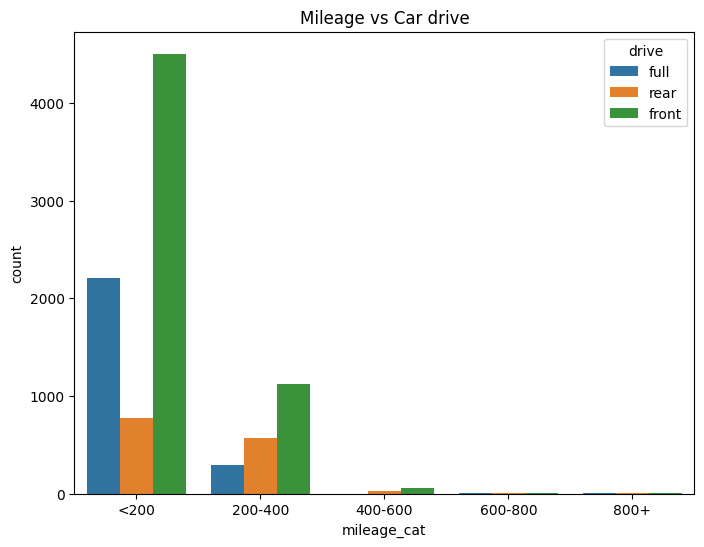

In [ ]:
cars['mileage_cat'] = pd.cut(cars.mileage, [0,200,400,600,800,1000], labels=['<200','200-400','400-600','600-800','800+'],  include_lowest=True)
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = cars,x = 'mileage_cat',hue='drive')
plt.title('Mileage vs Car drive')

Observation: Front drive cars are most prefered because of the high mileage they provide. next is the Full drive car with very low mileage(<200).

Text(0.5, 1.0, 'Car drive Vs. price')

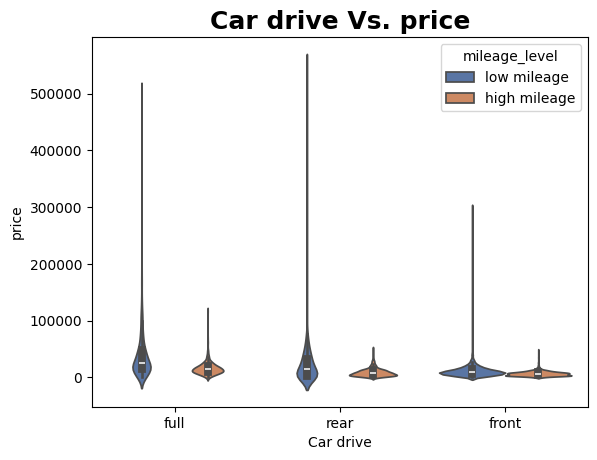

In [ ]:
ax = sns.violinplot(x="drive", y="price",hue='mileage_level', palette="deep", data=cars)
plt.xlabel("Car drive")
plt.ylabel("price")
plt.title("Car drive Vs. price", fontsize=18, fontweight = "bold")

Observation: In all the car drive types, low mileage car are highly priced. where as the high mileage cars are priced low.

Text(0.5, 1.0, 'Car fuel type Vs. price')

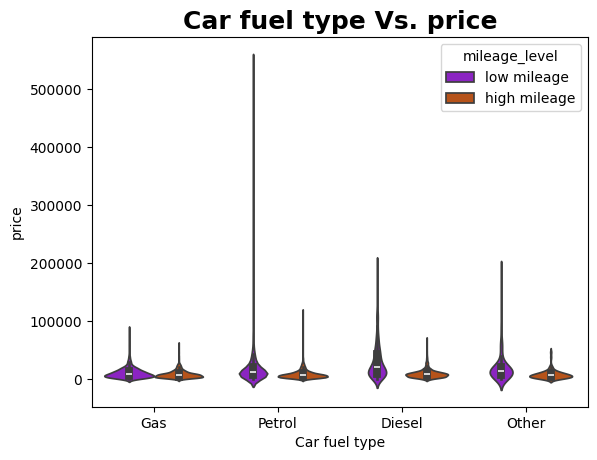

In [ ]:
ax = sns.violinplot(x="engtype", y="price",hue='mileage_level', palette="gnuplot", data=cars)
plt.xlabel("Car fuel type")
plt.ylabel("price")
plt.title("Car fuel type Vs. price", fontsize=18, fontweight = "bold")

Observation: In all the fuel types, low mileage car are highly priced. where as the high mileage cars are priced low.

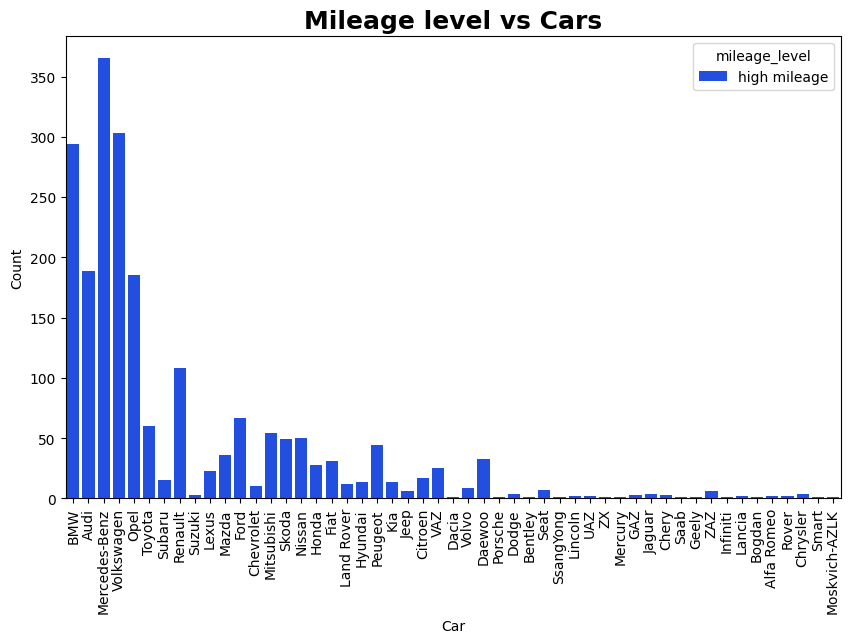

In [ ]:
carsales_plot = cars[(cars['mileage']> 200)]
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x='car',data=carsales_plot,hue='mileage_level',palette="bright")
plt.xlabel("Car")
plt.ylabel("Count")
plt.title("Mileage level vs Cars", fontsize=18, fontweight = "bold")
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Observation :- Benz and Volkswagan have better mileage, hence most preferred.

In [ ]:
top_10_model[]

,count
model,
Touareg,69
Passat B6,66
Caddy груз.,63
T5 (Transporter) пасс.,61
Polo,60
Passat B5,58
Caddy пасс.,55
Passat B7,51
Jetta,49


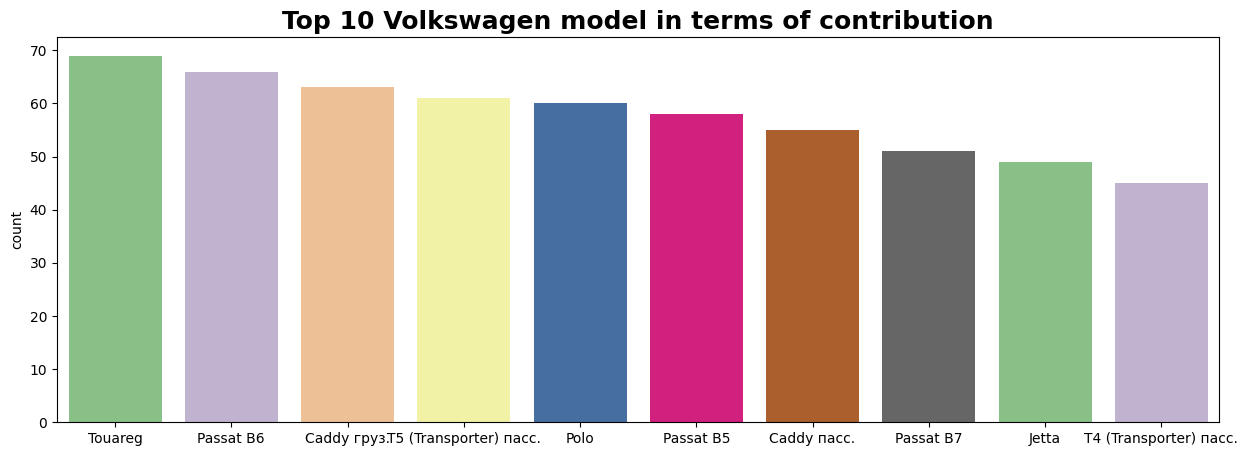

In [ ]:
usa = cars.loc[cars['car'] == 'Volkswagen']
top_10_model = usa['model'].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(top_10_model,palette="Accent")
plt.title('Top 10 Volkswagen model in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()


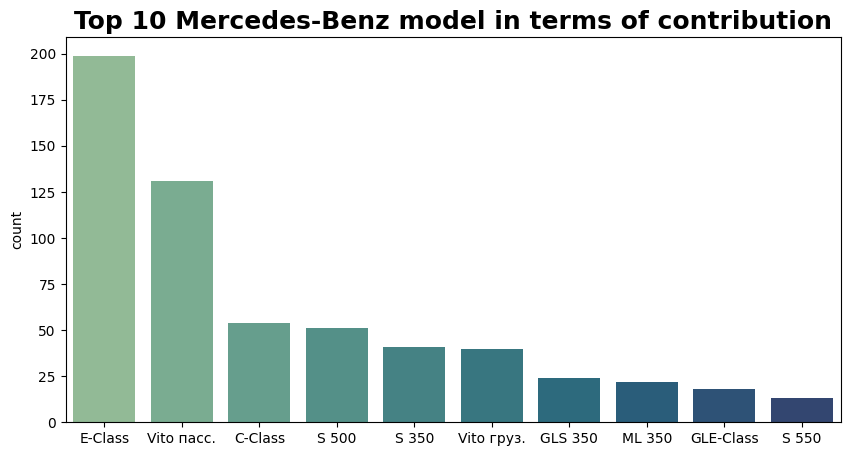

In [ ]:
usa1 = cars.loc[cars['car'] == 'Mercedes-Benz']
top_10_model1 = usa1['model'].value_counts()[:10]
plt.figure(figsize=(10,5))
sns.barplot(top_10_model1,palette="crest")
plt.title('Top 10 Mercedes-Benz model in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

Observation: Touareg & E-Class is the most prefered model in Volkswagen and Mercedes-Benz companies respectively.

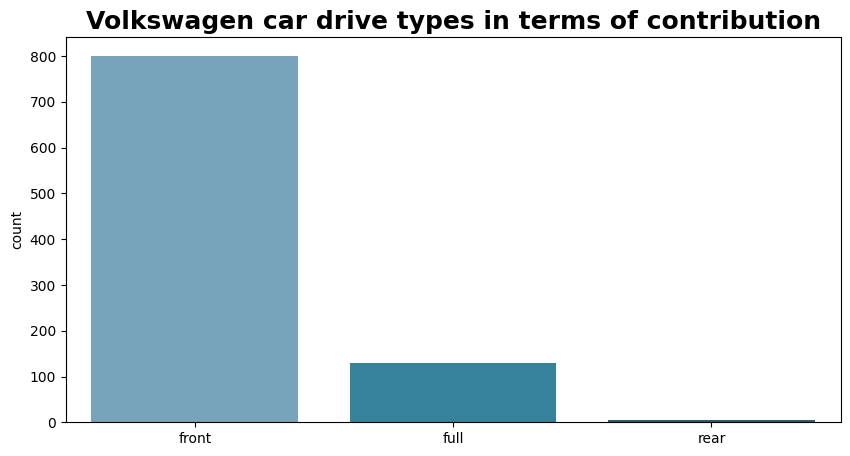

In [ ]:
usa = cars.loc[cars['car'] == 'Volkswagen']
top_10_model = usa['drive'].value_counts()[:]
plt.figure(figsize=(10,5))
sns.barplot(top_10_model,palette="PuBuGn_d")
plt.title('Volkswagen car drive types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

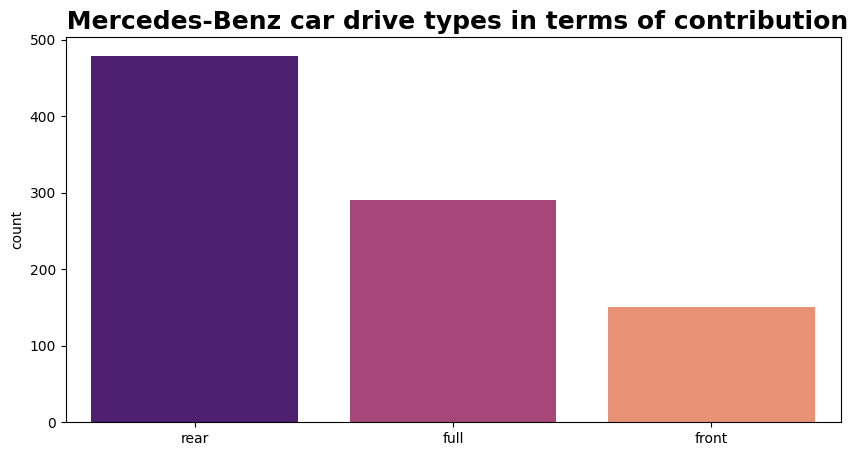

In [ ]:
usa1 = cars.loc[cars['car'] == 'Mercedes-Benz']
top_10_model1 = usa1['drive'].value_counts()[:]
plt.figure(figsize=(10,5))
sns.barplot(top_10_model1,palette="magma")
plt.title(' Mercedes-Benz car drive types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

Observation:front and rear drive is most preferred in Volkswagen and Mercedes-Benz companies respectively.

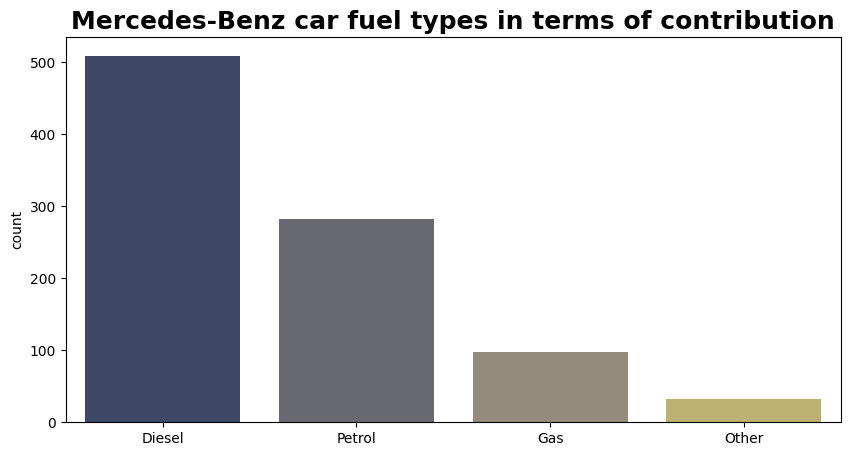

In [ ]:
usa1 = cars.loc[cars['car'] == 'Mercedes-Benz']
top_10_model1 = usa1['engtype'].value_counts()[:]
plt.figure(figsize=(10,5))
sns.barplot(top_10_model1,palette="cividis")
plt.title('Mercedes-Benz car fuel types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

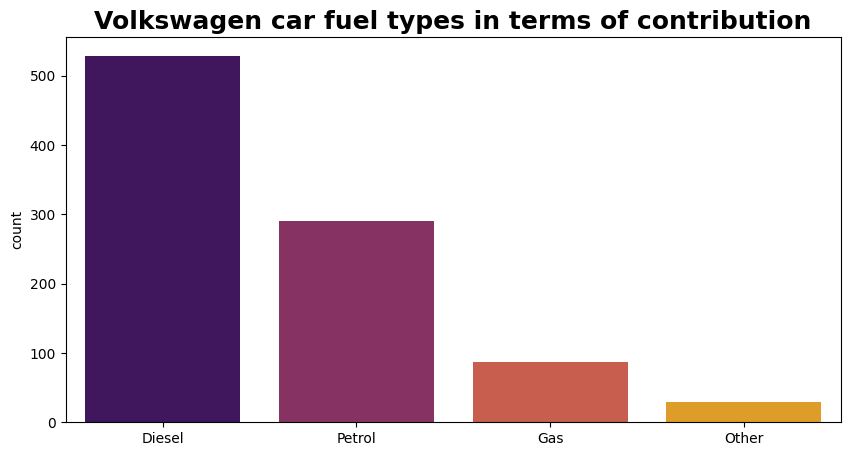

In [ ]:
usa = cars[cars['car'] == 'Volkswagen']
top_10_model = usa['engtype'].value_counts()[:]
plt.figure(figsize=(10,5))
sns.barplot(top_10_model,palette="inferno")
plt.title('Volkswagen car fuel types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

Observation:Diesel engines are most preferred in Volkswagen and Mercedes-Benz car companies.

<a id=section6></a>
## 6. Conclusion

- The Car sales Survrey being conducted helps us to know the most prefered car brand and features affecting it.
- Diesels cars provide high mileage are highly priced. But Gas cars provide equally high mileage but are priced low.
- In Front drive cars low mileage cars are highly priced.
- From the analyis, it was concluded that Volkswagen Front drive Diesel cars are most prefered.Followed by Mercedes-Benz Rear drive Diesel cars due to their features.